In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\91936\Downloads\Task_4.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,yes,2.0,Haanji,furnished
1,12250000,8960.0,NaN,4.0,4.0,yes,no,no,Nakko,yes,NaN,no,furnished
2,12250000,9960.0,3.0,2.0,2.0,yes,NaN,yes,no,Naaji,2.0,yes,semi-furnished
3,12215000,7500.0,NaN,NaN,NaN,NaN,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420.0,NaN,1.0,2.0,NaN,Of course,yes,NaN,yes,2.0,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,NaN,2.0,NaN,1.0,NaN,no,NaN,no,no,NaN,no,unfurnished
541,1767150,NaN,3.0,1.0,1.0,no,ille,no,no,Nah,NaN,NaN,NaN
542,1750000,3620.0,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,n,unfurnished
543,1750000,NaN,NaN,1.0,1.0,no,no,no,no,no,0.0,NaN,furnished


In [3]:
#droping any number of columns that are duplicate
df.drop_duplicates(inplace = True)
df.shape
#sortind dataset in increasing order of prices to get a better understandig of features 
df = df.sort_values('price', ascending = True)
df = df.reset_index(drop = True)

In [4]:
#finding unique values in each column to find what are the values we have to work with and convert same value with different
#name into one
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

price
[ 1750000  1767150  1820000  1855000  1890000  1960000  2100000  2135000
  2233000  2240000  2275000  2310000  2345000  2380000  2408000  2450000
  2485000  2520000  2590000  2604000  2653000  2660000  2695000  2730000
  2800000  2835000  2852500  2870000  2940000  2961000  2975000  3003000
  3010000  3045000  3080000  3087000  3115000  3118850  3129000  3143000
  3150000  3220000  3234000  3255000  3290000  3325000  3332000  3353000
  3360000  3395000  3423000  3430000  3465000  3493000  3500000  3535000
  3570000  3605000  3633000  3640000  3675000  3703000  3710000  3745000
  3773000  3780000  3815000  3836000  3850000  3885000  3920000  3990000
  4007500  4025000  4060000  4095000  4098500  4123000  4130000  4165000
  4193000  4200000  4235000  4270000  4277000  4305000  4319000  4340000
  4375000  4382000  4403000  4410000  4445000  4473000  4480000  4515000
  4543000  4550000  4585000  4613000  4620000  4655000  4690000  4753000
  4760000  4767000  4795000  4830000  4865000

In [5]:
#Replacing positive with 1 and negative with 0
#We are converting these strings into numbers because of ease of our own understanding and increasing readability of code
#Furthermore it'll be easier to deal with these values when training any algo on this dataset
all_y = ['yes','Of course','Haanji','Indeed','yep','Haan','True','y','Y',"['y']",'Yo','Haanji']
all_n = ['Nope','Naaji','False','Nakko','no','N','n','ille',"['n']",'Nah']
for j in df.columns:
    df[j] = df[j].replace(all_y,1)
    df[j] = df[j].replace(all_n,0)
    df[j] = df[j].replace("unfurnished",0)
    df[j] = df[j].replace("semi-furnished",1)
    df[j] = df[j].replace("furnished",2)
    
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1750000,3850.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1,1750000,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0
2,1750000,3620.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0
3,1767150,NaN,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1820000,NaN,2.0,NaN,1.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,11410000,7420.0,NaN,1.0,2.0,NaN,1.0,1.0,NaN,1.0,2.0,0.0,NaN
541,12215000,7500.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,3.0,1.0,2.0
542,12250000,9960.0,3.0,2.0,2.0,1.0,NaN,1.0,0.0,0.0,2.0,1.0,1.0
543,12250000,8960.0,NaN,4.0,4.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,2.0


In [6]:
#Checking for any left value that isn't converted into numbers
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

price
[ 1750000  1767150  1820000  1855000  1890000  1960000  2100000  2135000
  2233000  2240000  2275000  2310000  2345000  2380000  2408000  2450000
  2485000  2520000  2590000  2604000  2653000  2660000  2695000  2730000
  2800000  2835000  2852500  2870000  2940000  2961000  2975000  3003000
  3010000  3045000  3080000  3087000  3115000  3118850  3129000  3143000
  3150000  3220000  3234000  3255000  3290000  3325000  3332000  3353000
  3360000  3395000  3423000  3430000  3465000  3493000  3500000  3535000
  3570000  3605000  3633000  3640000  3675000  3703000  3710000  3745000
  3773000  3780000  3815000  3836000  3850000  3885000  3920000  3990000
  4007500  4025000  4060000  4095000  4098500  4123000  4130000  4165000
  4193000  4200000  4235000  4270000  4277000  4305000  4319000  4340000
  4375000  4382000  4403000  4410000  4445000  4473000  4480000  4515000
  4543000  4550000  4585000  4613000  4620000  4655000  4690000  4753000
  4760000  4767000  4795000  4830000  4865000

In [7]:
#Droping all rows that have less than 8 NOT NULL values 
#because such rows are pretty much useless and if we fill them then it will only decrease accuracy of our algo
#Thresh specifies the number of NOT NULL values required to keep the row.
df.dropna(axis = 0,thresh = 8,inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(427, 13)

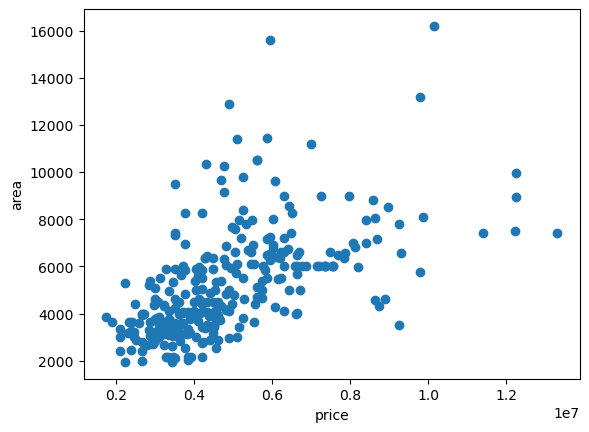

In [8]:
#PRICE VS AREA
plt.scatter(df['price'], df['area'])
plt.xlabel('price')
plt.ylabel('area')
plt.show()

In [9]:
#Filling in nan values depending on the condition they satisfy
for i in df.index:
    if(df.loc[i,'price'] < 4300000 and np.isnan(df.loc[i, 'area'])):
        df.loc[i,'area'] = 4000
    elif(df.loc[i,'price'] < 6000000 and np.isnan(df.loc[i, 'area'])):
        df.loc[i,'area'] = 5000
    elif(df.loc[i,'price'] < 8000000 and np.isnan(df.loc[i, 'area'])):
        df.loc[i,'area'] = 6000
    elif(df.loc[i,'price'] <10000000 and np.isnan(df.loc[i, 'area'])):
        df.loc[i,'area'] = 9000
    elif(np.isnan(df.loc[i, 'area'])):
        df.loc[i,'area'] = 7500
print(df['area'].isna().sum())

0


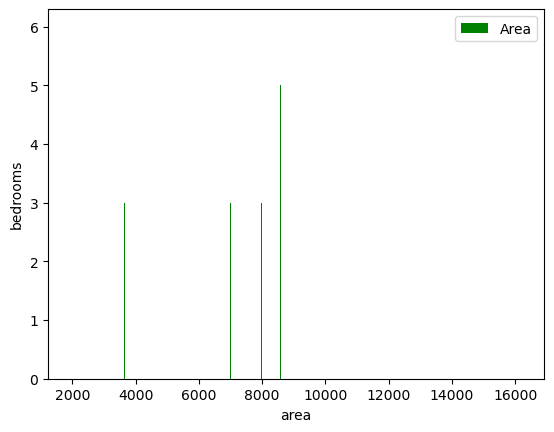

In [10]:
#PRICE VS BEDROOMS
#plt.plot(df['price'], df['bedrooms'], color = 'orange', label = 'Price')
plt.bar(df['area'],df['bedrooms'], color = 'green', label = 'Area')
plt.xlabel('area')
plt.ylabel('bedrooms')
plt.legend()
plt.show()

In [11]:
for i in df.index:
    if(df.loc[i,'area']<=8000 and np.isnan(df.loc[i,'bedrooms'])):
        df.loc[i,'bedrooms'] = 3
    elif(np.isnan(df.loc[i,'bedrooms'])):
        df.loc[i,'bedrooms'] = 5
#df
df['bedrooms'].isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

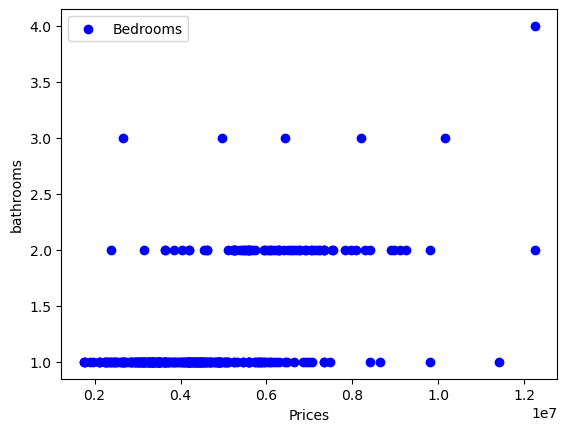

In [12]:
plt.scatter(df['price'], df['bathrooms'], color = 'blue', label = 'Bedrooms')
plt.xlabel('Prices')
plt.ylabel('bathrooms')
plt.legend()
plt.show

In [13]:
#Filling missing values according to the observations made from the scattered plot
for i in df.index:
    if(df.loc[i,'price'] < 6000000 and np.isnan(df.loc[i, 'bathrooms'])):
        df.loc[i,'bathrooms'] = 1
    elif(np.isnan(df.loc[i, 'bathrooms'])):
        df.loc[i,'bathrooms'] = 2
print(df['bathrooms'].isna().sum())

0


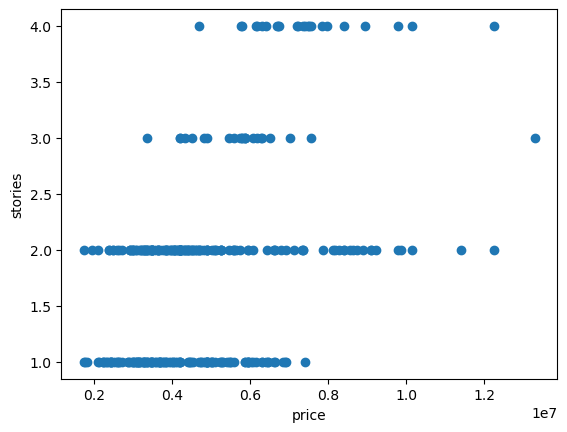

In [14]:
#PRICE VS STORIES
plt.scatter(df['price'], df['stories'])
plt.xlabel('price')
plt.ylabel('stories')
plt.show()

In [15]:
#In all price ranges stories are 2 for most rows therefore filled all nan values with 2
for i in df.index:
    if(df.loc[i,'price']<12000000 and np.isnan(df.loc[i,'stories'])):
        df.loc[i,'stories'] = 2
    elif(np.isnan(df.loc[i,'stories'])):
        df.loc[i,'stories'] = 3
print(df['stories'].isna().sum())

0


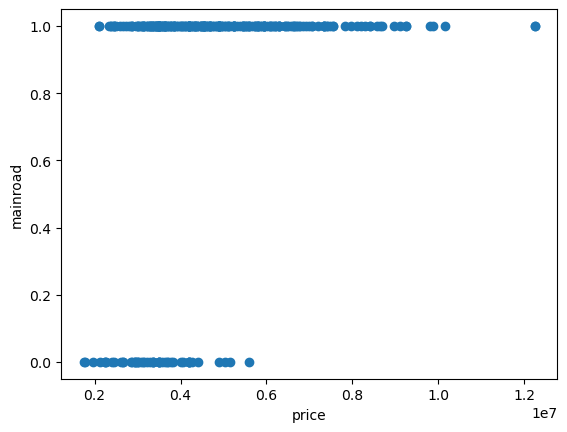

In [16]:
#PRICE VS MAINROAD
plt.scatter(df['price'], df['mainroad'])
plt.xlabel('price')
plt.ylabel('mainroad')
plt.show()

In [17]:
#Filling missing values according to the observations made from scattered plot
for i in df.index:
    if(df.loc[i,'price']<4200000 and np.isnan(df.loc[i,'mainroad'])):
        df.loc[i,'mainroad'] = 0
    elif(np.isnan(df.loc[i,'mainroad'])):
        df.loc[i,'mainroad'] = 1
        
df['mainroad'].isna().sum()

0

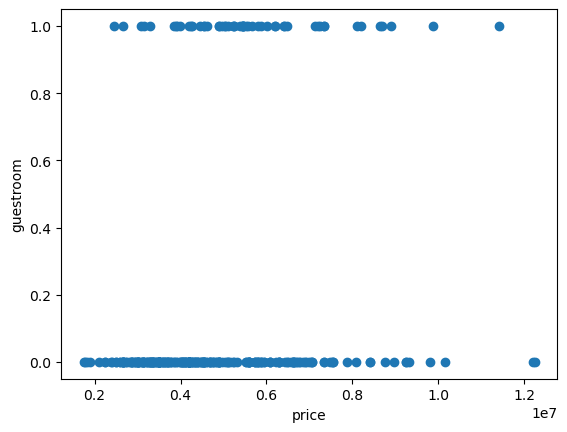

In [18]:
#PRICE VS GUESTROOM
plt.scatter(df['price'], df['guestroom'])
plt.xlabel('price')
plt.ylabel('guestroom')
plt.show()

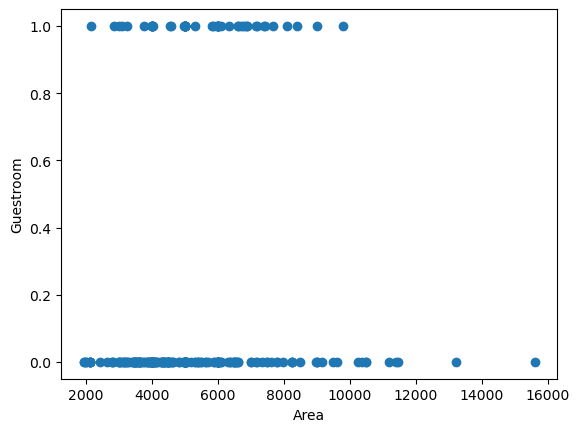

In [19]:
plt.scatter(df['area'],df['guestroom'])
plt.xlabel('Area')
plt.ylabel('Guestroom')
plt.show()

In [20]:
#Filling missing values according to the observations made from scattered plot
df['guestroom'].fillna(0,inplace = True)

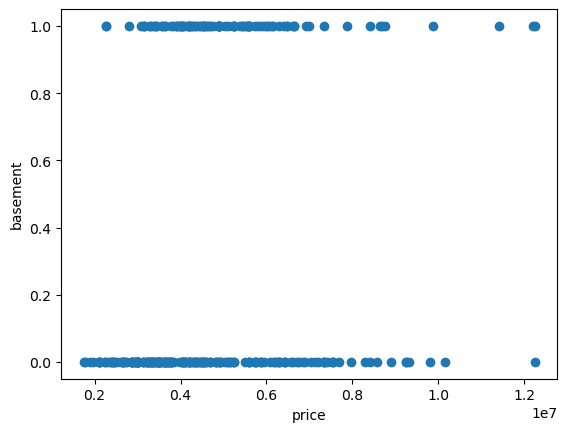

In [21]:
#PRICE VS BASEMENT
plt.scatter(df['price'], df['basement'])
plt.xlabel('price')
plt.ylabel('basement')
plt.show()

189
101


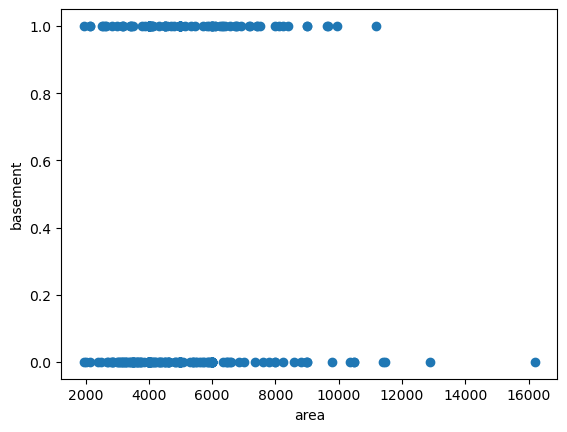

In [22]:
#Checking how many fields have besement and how many does not have basement
print(np.count_nonzero(df['basement'] == 0))
print(np.count_nonzero(df['basement'] == 1))
#PRICE VS BASEMENT
plt.scatter(df['area'], df['basement'])
plt.xlabel('area')
plt.ylabel('basement')
plt.show()

In [23]:
#Filing all missing basement values as 0 because in all price ranges it is mot occured
for i in df.index:
    if(df.loc[i,'price']<10000000 and np.isnan(df.loc[i,'basement'])):
        df.loc[i,'basement'] = 0
    elif(np.isnan(df.loc[i,'basement'])):
        df.loc[i,'basement'] = 1
df['basement'].isna().sum()

0

281
13


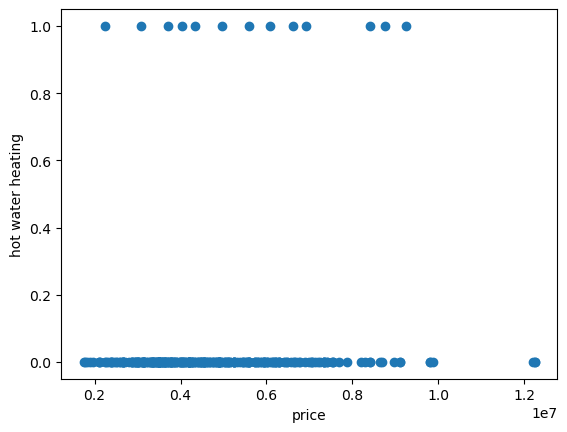

In [24]:
print(np.count_nonzero(df['hotwaterheating'] == 0))
print(np.count_nonzero(df['hotwaterheating'] == 1))
#PRICE VS HOT WATER HEATING
plt.scatter(df['price'], df['hotwaterheating'])
plt.xlabel('price')
plt.ylabel('hot water heating')
plt.show()

In [25]:
#Filliing all missing values as 0 because it's overwhelmingly more occured
df['hotwaterheating'].fillna(0,inplace = True)

202
101


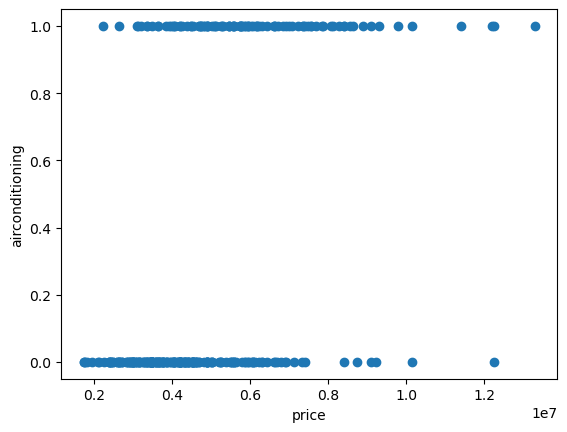

In [26]:
print(np.count_nonzero(df['airconditioning'] == 0))
print(np.count_nonzero(df['airconditioning'] == 1))
#PRICE VS AIR CONDITIONING
plt.scatter(df['price'], df['airconditioning'])
plt.xlabel('price')
plt.ylabel('airconditioning')
plt.show()

In [27]:
#Filling in missing values according to the observations made
for i in df.index:
    if(df.loc[i,'price']<6600000 and np.isnan(df.loc[i,'airconditioning'])):
        df.loc[i,'airconditioning'] = 0
    elif(np.isnan(df.loc[i,'airconditioning'])):
        df.loc[i,'airconditioning'] = 1
df['airconditioning'].isna().sum()

0

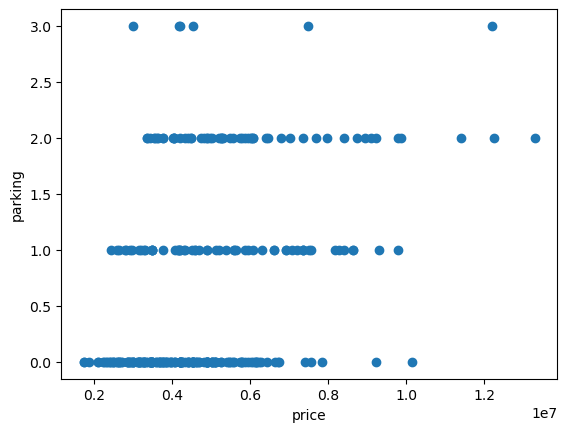

In [28]:
#PRICE VS PARKING
plt.scatter(df['price'], df['parking'])
plt.xlabel('price')
plt.ylabel('parking')
plt.show()

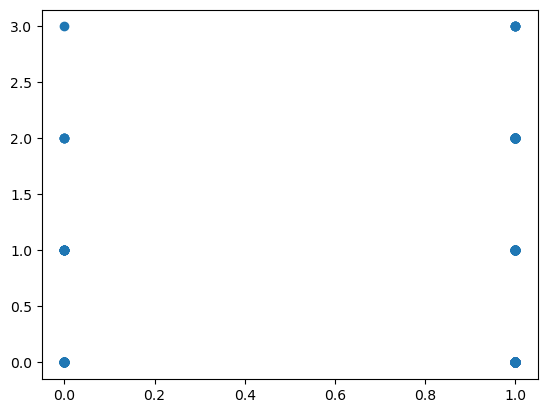

In [29]:
plt.scatter(df['mainroad'],df['parking'])

In [30]:
#Filling in missing values by obverving the scattered plot
for i in df.index:
    if(df.loc[i,'price']<6000000 and np.isnan(df.loc[i,'parking'])):
        df.loc[i,'parking'] = 0
    elif(df.loc[i,'price']<10000000 and np.isnan(df.loc[i,'parking'])):
        df.loc[i,'parking'] = 1
    elif(np.isnan(df.loc[i,'parking'])):
        df.loc[i,'parking'] = 2
        
df['parking'].isna().sum()

0

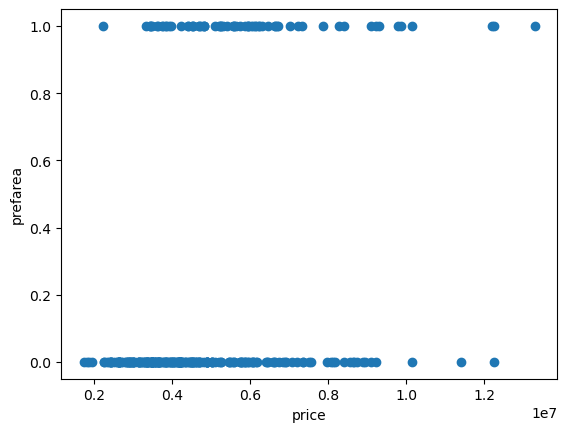

In [31]:
#PRICE VS PREFAREA
#I don't know exactly what prefarea is but google says it's something related to house pricing prediction
plt.scatter(df['price'], df['prefarea'])
plt.xlabel('price')
plt.ylabel('prefarea')
plt.show()

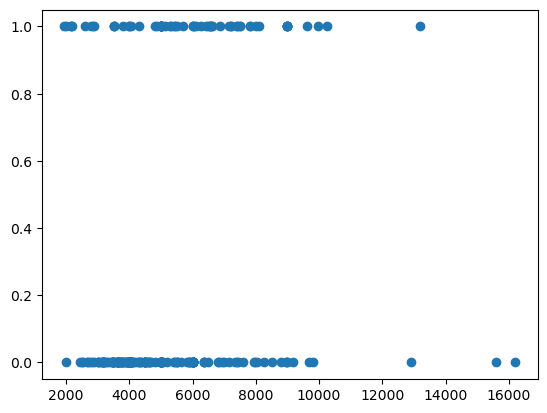

In [32]:
plt.scatter(df['area'],df['prefarea'])

In [33]:
#Filling missing values by observing scatted plot
for i in df.index:
    if(df.loc[i,'price']<9000000 and np.isnan(df.loc[i,'prefarea'])):
        df.loc[i,'prefarea'] = 0
    elif(np.isnan(df.loc[i,'prefarea'])):
        df.loc[i,'prefarea'] = 1
        
df['prefarea'].isna().sum()

0

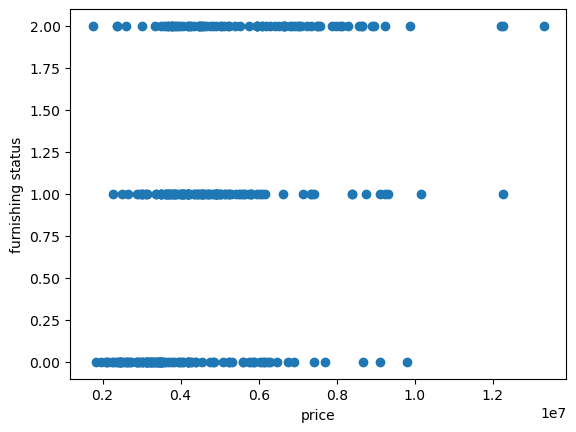

In [34]:
#PRICE VS FURNISHING STATUS
plt.scatter(df['price'], df['furnishingstatus'])
plt.xlabel('price')
plt.ylabel('furnishing status')
plt.show()

In [35]:
#Filling missing values by observing scatted plot
for i in df.index:
    if(df.loc[i,'price']<5800000 and np.isnan(df.loc[i,'furnishingstatus'])):
        df.loc[i,'furnishingstatus'] = 0
    elif(np.isnan(df.loc[i,'furnishingstatus'])):
        df.loc[i,'furnishingstatus'] = 2
        
df['furnishingstatus'].isna().sum()

0

In [36]:
#Checking if any nan value is remaining
df.isna().sum().sum()

0

In [37]:
#Finally converting cleaned data into excel file
df.to_csv("cleanedSheet.csv")

In [38]:
#Convertig values back to string for understandibility of human and to avoid confusion because
#there are some fields which actually have numerical value such as 'stories' and they have significance other than yes or no
for j in range(5,10):
    for i in df.index:
        if(df.iloc[i,j] == 0):
            df.iloc[i,j] = "NO"
        elif(df.iloc[i,j] == 1):
            df.iloc[i,j] = "YES"
        if(df.loc[i,'prefarea'] == 0):
            df.loc[i,'prefarea'] = "NO"
        elif(df.loc[i,'prefarea'] == 1):
            df.loc[i,'prefarea'] = "YES"
            
        if(df.loc[i,'furnishingstatus'] == 0):
            df.loc[i,'furnishingstatus'] = "UNFURNISHED"
        elif(df.loc[i,'furnishingstatus'] == 1):
            df.loc[i,'furnishingstatus'] = "SEMI-FURNISHED"
        elif(df.loc[i,'furnishingstatus'] == 2):
            df.loc[i,'furnishingstatus'] = "FURNISHED"
            
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1750000,3850.0,3.0,1.0,2.0,NO,NO,NO,NO,NO,0.0,NO,UNFURNISHED
1,1750000,4000.0,3.0,1.0,1.0,NO,NO,NO,NO,NO,0.0,NO,FURNISHED
2,1767150,4000.0,3.0,1.0,1.0,NO,NO,NO,NO,NO,0.0,NO,UNFURNISHED
3,1820000,4000.0,2.0,1.0,1.0,NO,NO,NO,NO,NO,0.0,NO,UNFURNISHED
4,1890000,3649.0,2.0,1.0,2.0,NO,NO,NO,NO,NO,0.0,NO,UNFURNISHED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,11410000,7420.0,3.0,1.0,2.0,YES,YES,YES,NO,YES,2.0,NO,FURNISHED
423,12215000,7500.0,3.0,2.0,3.0,YES,NO,YES,NO,YES,3.0,YES,FURNISHED
424,12250000,9960.0,3.0,2.0,2.0,YES,NO,YES,NO,NO,2.0,YES,SEMI-FURNISHED
425,12250000,8960.0,5.0,4.0,4.0,YES,NO,NO,NO,YES,2.0,NO,FURNISHED


In [39]:
#Converting this file to excel separately
df.to_csv("cleanedSheet_1.csv")